# **Analyzing 1 million game simulation results**

In [2]:
import pandas as pd
df_1M = pd.read_csv('test_1M.csv')
df_1M.set_index('game_num',inplace=True)

display(df_1M.head())

,rounds,wars,double_wars,winner,hit_max_rounds
game_num,,,,,
1,428,21,0,2.0,False
2,104,10,0,1.0,False
3,3000,5,0,NaN,True
4,3000,113,3,NaN,True
5,250,14,1,2.0,False


887576 games under 3000 round limit
count    887576.000000
mean        526.077264
std         458.506446
min           2.000000
25%         192.000000
50%         390.000000
75%         720.000000
max        2999.000000
Name: rounds, dtype: float64


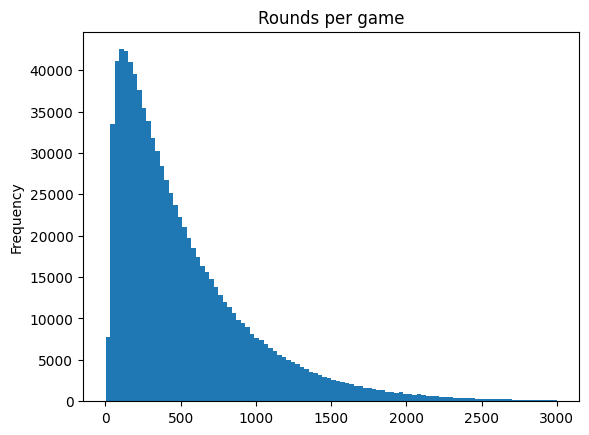

In [3]:
# Distibution of rounds per game
N = 3000 # Number of moves constituting an infinite game
exclude_inf = df_1M[df_1M['rounds'] < N] # Rounds excluding infinite games
not_infinite = (df_1M['rounds'] < N).sum() # Number of games under N limit

print(f'{not_infinite} games under {N} round limit')
exclude_inf['rounds'].plot.hist(bins=100,title='Rounds per game')
print(exclude_inf['rounds'].describe())

count    887576.000000
mean         18.266543
std          14.082612
min           0.000000
25%           8.000000
50%          14.000000
75%          24.000000
max         136.000000
Name: wars, dtype: float64


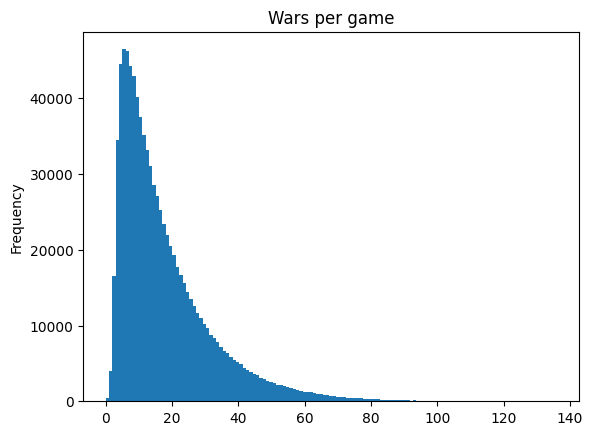

In [4]:
# Distribution of WARS per game
exclude_inf['wars'].plot.hist(bins=135,title='Wars per game')
print(exclude_inf['wars'].describe())

In [5]:
# Low round games
low_round = exclude_inf[exclude_inf['rounds'] < 10]
display(low_round.sort_values(by='rounds',ascending=True))

,rounds,wars,double_wars,winner,hit_max_rounds
game_num,,,,,
999332,2,6,4,1.0,False
423555,5,7,3,1.0,False
166849,6,6,3,1.0,False
56780,6,5,3,1.0,False
659895,6,6,3,2.0,False
...,...,...,...,...,...
720590,9,6,3,2.0,False
517939,9,6,0,1.0,False
544759,9,5,0,2.0,False


count    887576.00000
mean          0.71620
std           0.97628
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          11.00000
Name: double_wars, dtype: float64
Games that exhibited double wars: 46.48%


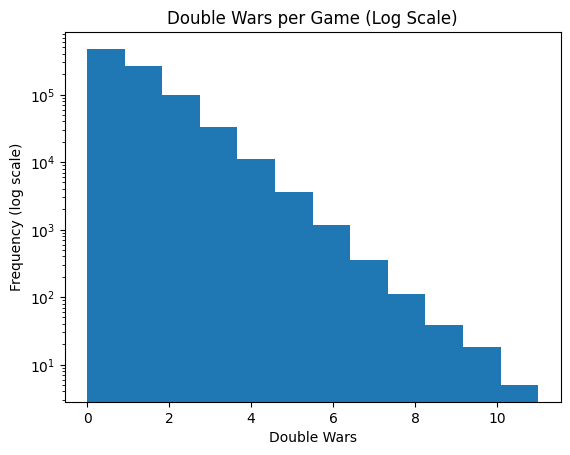

In [27]:
# Distribution of DOUBLE WARS per game
print(exclude_inf['double_wars'].describe())
include_doub_wars = (exclude_inf['double_wars'] > 0).mean()
print(f'Games that exhibited double wars: {include_doub_wars*100:.2f}%')
import matplotlib.pyplot as plt
plt.hist(exclude_inf['double_wars'], bins=12, log=True)
plt.title('Double Wars per Game (Log Scale)')
plt.xlabel('Double Wars')
plt.ylabel('Frequency (log scale)')
plt.show()